Modulo basico - Analise exploratoria de Dados com Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importando a base inicial
df = pd.read_csv('../../data/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S


Entendendo os tipos de variaves que temos na base

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# criando duas listas com nomes das colunas, uma para colinas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object': # type: ignore
        quali.append(i)
    else:
        quanti.append(i)

In [7]:
print('Lista Quanti: ', quanti)
print('Lista Quali: ', quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
# criando um dataframe para as variaveis quanti para fazer estatistica descritiva

df_quanti = df[quanti]

In [9]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.25
1,2,1,1,38.0,1,0,712833.00
2,3,1,3,26.0,0,0,7925.00
3,4,1,1,35.0,1,0,53.10
4,5,0,3,35.0,0,0,300.00
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.00
887,888,1,1,19.0,0,0,30.00
888,889,0,3,NaN,1,2,23.45
889,890,1,1,26.0,0,0,30.00


In [10]:
# estatistica descritiva
df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.717325,0.523008,0.381594,7.424598e+05
std,257.353842,0.486592,0.836071,14.591695,1.102743,0.806057,5.995953e+06
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,2.655000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,7.333000e+03
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,2.546670e+05
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.240913e+08


In [11]:
# calculando mediana que nao esta no comando anterior
df_quanti.median()

PassengerId     446.0
Survived          0.0
Pclass            3.0
Age              28.0
SibSp             0.0
Parch             0.0
Fare           7333.0
dtype: float64

In [12]:
# Tabela de frequencia para as variaveis qualitativas

df_quali = df[quali]

# fazendo a tabela de frequencia para a variavel Sex

df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [13]:
# fazendo todas as tttabelas de frequencia de uma evz so
# vamos desconsiderar a variavel Name que sera unica para cad passageiro

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('---------------')
        print('Variavel: ', i)
        print(df_quali.groupby(i).Name.count())
        print('---------------')

---------------
Variavel:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
---------------
---------------
Variavel:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
---------------
---------------
Variavel:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
---------------
---------------
Variavel:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
---------------


Deteccao de dados nulos

In [14]:
# para cada variavel no df, iremos pegar a quantidade de dados nulos
# visualizar quantos nulos temos em cada variavel
# criar uma tabela para visualizar isso (um data frame)

nulos = pd.DataFrame()
nulos['Variavel'] =  df.columns

In [15]:
nulos

,Variavel
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [16]:
nulos = (
    df.isna().sum()
      .reset_index()
      .rename(columns={"index": "Variavel", 0: "Quantidade"})
)
nulos["Porcentagem"] = ((nulos["Quantidade"] / df["PassengerId"].count()) * 100).round(2)


In [17]:
nulos

,Variavel,Quantidade,Porcentagem
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,177,19.87
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,0,0.00


In [18]:
# removendo as linhas da variavel embarked

df2 = df.dropna(subset=['Embarked'])

In [19]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,300.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [20]:
# preenchendo a variavel Age

df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [21]:
df3.Age.isna().sum()

np.int64(0)

In [22]:
# preenchendo a variavel Cabin

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [23]:
# escolher um valor dentro da moda e preencher aleatoriamente

moda = []

for i in df4.Cabin.mode().values:
    moda.append(i)


In [24]:
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [25]:
# preenchendo com valores aleatorios da moda
import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [26]:
df4.Cabin.isna().sum()

np.int64(0)

In [27]:
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7925.00,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,300.00,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.660351,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C


Deteccao de Outliers

<Axes: >

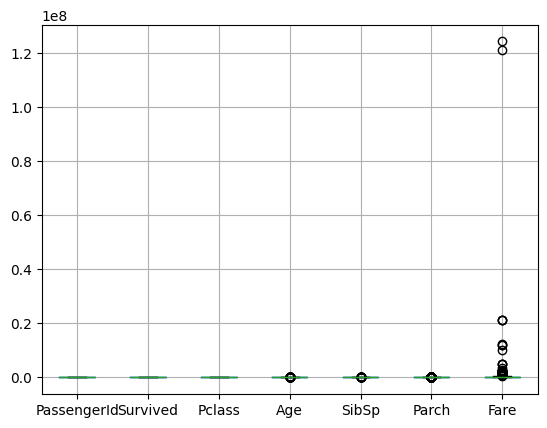

In [28]:
# usar primeiro o boxplot como recurso

df4.boxplot()

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].set_title('Survived')
axs[0, 0].boxplot(df4.Survived)

axs[0, 1].set_title('Pclass')
axs[0, 1].boxplot(df4.Pclass)

axs[0, 2].set_title('Age')
axs[0, 2].boxplot(df4.Age)

axs[1, 0].set_title('SibSp')
axs[1, 0].boxplot(df4.SibSp)

axs[1, 1].set_title('Parch')
axs[1, 1].boxplot(df4.Parch)

axs[1, 2].set_title('Fare')
axs[1, 2].boxplot(df4.Fare)

{'whiskers': [<matplotlib.lines.Line2D at 0x1442a5f8410>,
 'caps': [<matplotlib.lines.Line2D at 0x1442a5f8690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1442a5f82d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1442a5f8910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1442a5f8a50>],
 'means': []}

In [37]:
# Cálculo dos Outliers

# Todos os pontos que estão fora do limite superior e inferior da amostra
# Limite superior = Q3 + 1,5 * DistânciaInterquartil
# Limite inferior = Q1 - 1,5 * DistânciaInterquartil
# Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)

# Fazendo este cálculo para estas o Dataframe todo (apenas o quantitativo)

df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []

for i in df4_quanti.columns:
    q1 = np.quantile(df4_quanti[i], 0.25)
    q3 = np.quantile(df4_quanti[i], 0.75)
    dist = q3 - q1
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print('----------------')
    print(dist)
    print(lim_inf)
    print(lim_sup)
    
    outlier = 0
    
    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier = outlier + 1
        else:
            pass
    
    outliers.append(outlier)

df_outlier = pd.DataFrame()
df_outlier['variavel'] = colunas
df_outlier['outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100

----------------
444.0
-442.0
1334.0
----------------
1.0
-1.5
2.5
----------------
1.0
0.5
4.5
----------------
13.0
2.5
54.5
----------------
1.0
-1.5
2.5
----------------
0.0
0.0
0.0
----------------
254640.45
-381934.12500000006
636627.675
